# paper: FRB 220319aaeb

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [5]:
# input variables 
candidate = '220319aaeb'
datestring = '2022_3_18_4_44_53'
beam = 172
corr = 'corr09'
snr_heimdall = 41.7
dm_heimdall = 111
width_heimdall = 1 

voltage = True
dedisperse = False 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

2022-06-09 23:12:08,365 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-09 23:12:08,382 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-09 23:12:08,384 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-09 23:12:08,387 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /data/dsa110/T1/corr09/2022_3_18_4_44_53/fil_220319aaeb/220319aaeb_172.fil


2022-06-09 23:12:08,393 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-09 23:12:09,221 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-09 23:12:09,223 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-09 23:12:09,225 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /home/ubuntu/vikram/scratch/220319aaeb.fil
/home/ubuntu/vikram/scratch/220319aaeb.fil 3.2768e-05 0.000262144


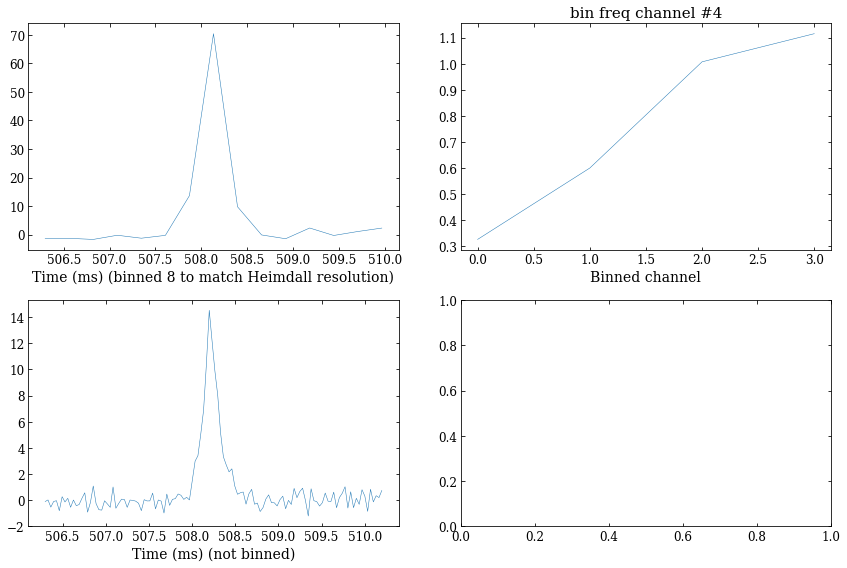

In [7]:
bd_heimdall, fil_file_heimdall = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


print(fil_file, bd.tsamp, bd_heimdall.tsamp)
data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 60 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-09 23:12:35,657 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 23:12:35,659 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 23:12:35,666 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-06-09 23:12:35,674 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-09 23:12:35,682 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-06-09 23:12:35,686 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-09 23:12:35,693 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-06-09 23:12:35,701 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-09 23:12:35,705 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-09 23:12:35,711 - initial_profi

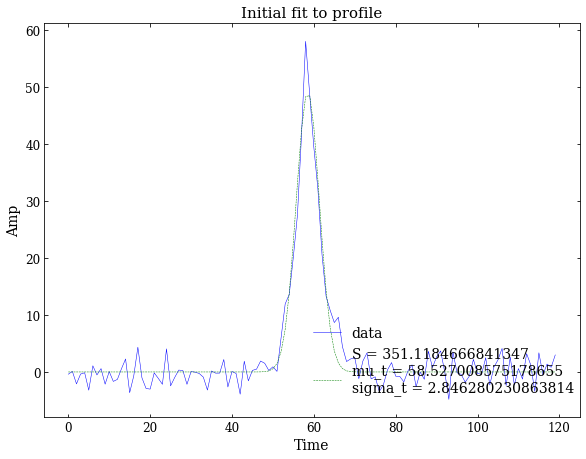

2022-06-09 23:12:36,122 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 23:12:36,124 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe543a1e1e0>
[0.09705494 0.26526412 0.44478154 0.48285386]


2022-06-09 23:12:36,128 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 23:12:36,129 - initial_spectrafit -burstfit.fit - INFO - c0: 0.09705493599176407 +- 0.0
2022-06-09 23:12:36,130 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2652641236782074 +- 0.0
2022-06-09 23:12:36,131 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4447815418243408 +- 0.0


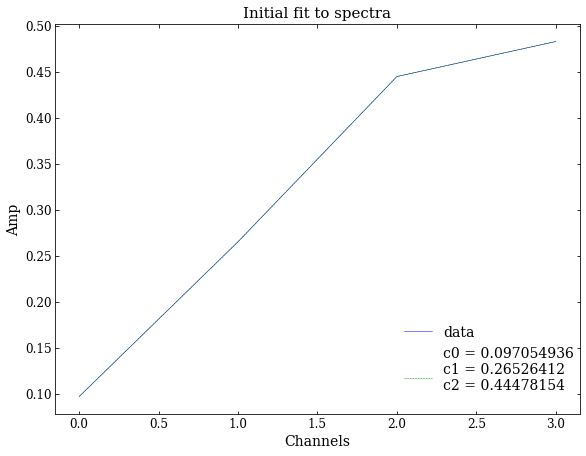

2022-06-09 23:12:36,357 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-09 23:12:36,359 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.097054936, 0.26526412, 0.44478154, 351.1184666841347, 58.527008575178655, 2.846280230863814, 111]
2022-06-09 23:12:36,422 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 23:12:36,427 - sgram_fit -burstfit.fit - INFO - c0: 0.0923651938814403 +- 0.012266531267548814
2022-06-09 23:12:36,429 - sgram_fit -burstfit.fit - INFO - c1: 0.27027368074993885 +- 0.010112851121509657
2022-06-09 23:12:36,430 - sgram_fit -burstfit.fit - INFO - c2: 0.43933255995896575 +- 0.009959763402443074
2022-06-09 23:12:36,432 - sgram_fit -burstfit.fit - INFO - S: 284.4159950191938 +- 10.013511365454647
2022-06-09 23:12:36,434 - sgram_fit -burstfit.fit - INFO - mu_t: 58.53291409254457 +- 0.16252724928999826
2022-06-09 23:12:36,435 - sgram_fit -burstfit.fit - INFO - sigma_t: 3.136547863957624 +- 0.0

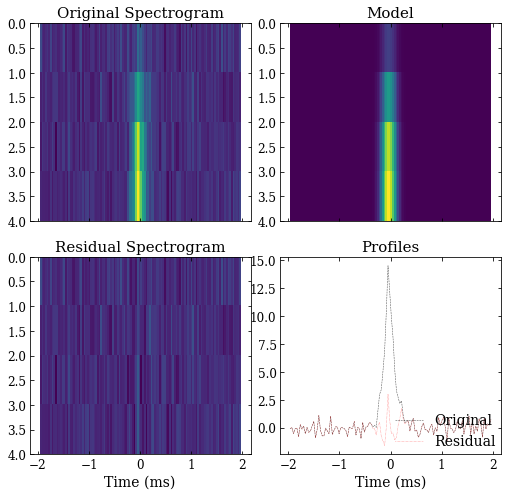

2022-06-09 23:12:37,089 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:37,095 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 23:12:37,100 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 23:12:37,105 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 23:12:37,110 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:37,112 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 23:12:37,120 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.317683940402132
2022-06-09 23:12:37,124 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-09 23:12:37,126 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-09 23:12:37,129 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to 

{bf}.calc_redchisq()= 1.317683940402132


In [10]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 50, 0),(np.inf, 70, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-09 23:12:44,066 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 23:12:44,068 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 23:12:44,072 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-06-09 23:12:44,073 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-09 23:12:44,077 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-06-09 23:12:44,078 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-09 23:12:44,082 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-06-09 23:12:44,084 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-09 23:12:44,085 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-09 23:12:44,087 - initial_profi

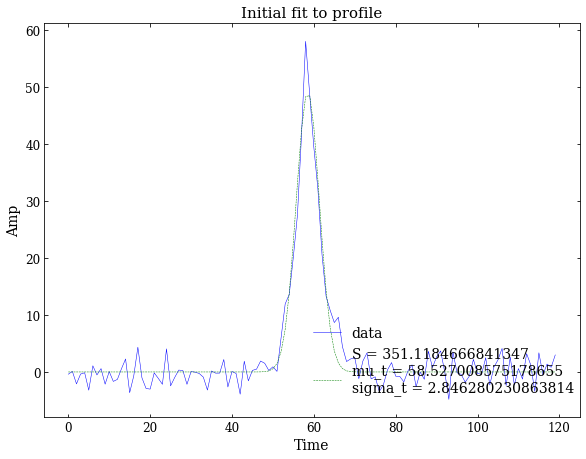

2022-06-09 23:12:44,272 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 23:12:44,274 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe543a1e1e0>
[0.09705494 0.26526412 0.44478154 0.48285386]


2022-06-09 23:12:44,278 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 23:12:44,279 - initial_spectrafit -burstfit.fit - INFO - c0: 0.09705493599176407 +- 0.0
2022-06-09 23:12:44,280 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2652641236782074 +- 0.0
2022-06-09 23:12:44,281 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4447815418243408 +- 0.0


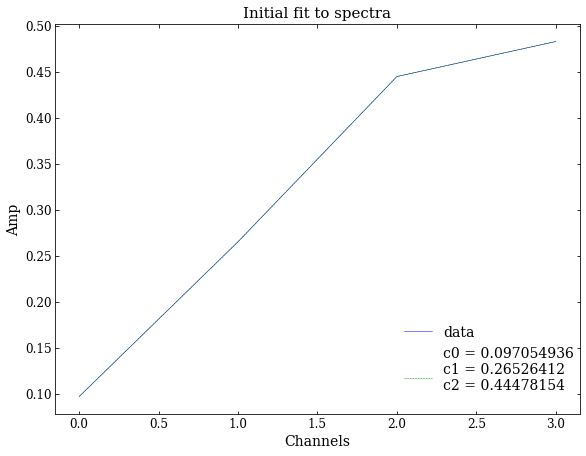

2022-06-09 23:12:44,499 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-09 23:12:44,501 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.097054936, 0.26526412, 0.44478154, 351.1184666841347, 58.527008575178655, 2.846280230863814, 111]
2022-06-09 23:12:44,545 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 23:12:44,550 - sgram_fit -burstfit.fit - INFO - c0: 0.0923651938814403 +- 0.012266531267548814
2022-06-09 23:12:44,554 - sgram_fit -burstfit.fit - INFO - c1: 0.27027368074993885 +- 0.010112851121509657
2022-06-09 23:12:44,559 - sgram_fit -burstfit.fit - INFO - c2: 0.43933255995896575 +- 0.009959763402443074
2022-06-09 23:12:44,563 - sgram_fit -burstfit.fit - INFO - S: 284.4159950191938 +- 10.013511365454647
2022-06-09 23:12:44,568 - sgram_fit -burstfit.fit - INFO - mu_t: 58.53291409254457 +- 0.16252724928999826
2022-06-09 23:12:44,571 - sgram_fit -burstfit.fit - INFO - sigma_t: 3.136547863957624 +- 0.0

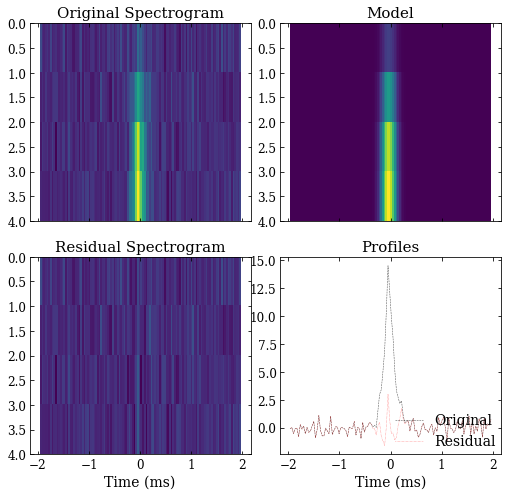

2022-06-09 23:12:45,029 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:45,031 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 23:12:45,034 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 23:12:45,036 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 23:12:45,039 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:45,041 - model -burstfit.fit - INFO - Found 1 components.
2022-06-09 23:12:45,044 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.317683940402132
2022-06-09 23:12:45,045 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-09 23:12:45,046 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-09 23:12:45,048 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-09 23:12:45,074 - initial_profilef

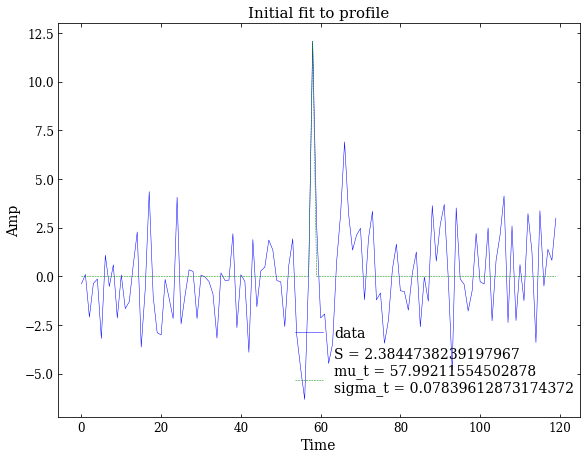

2022-06-09 23:12:45,305 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-09 23:12:45,309 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7fe543a1e1e0>
[-0.0076605417807847215 0.0464887871461892 0.8421124584948237
 0.23045805049875892]


2022-06-09 23:12:45,315 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-09 23:12:45,319 - initial_spectrafit -burstfit.fit - INFO - c0: -0.0076605417807847215 +- 0.0
2022-06-09 23:12:45,321 - initial_spectrafit -burstfit.fit - INFO - c1: 0.0464887871461892 +- 0.0
2022-06-09 23:12:45,323 - initial_spectrafit -burstfit.fit - INFO - c2: 0.8421124584948237 +- 0.0


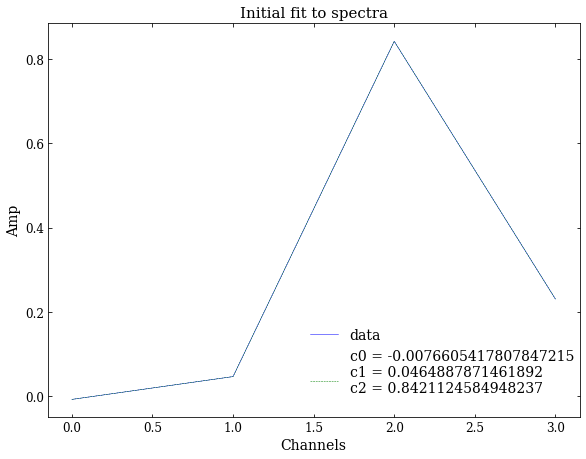

2022-06-09 23:12:45,593 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-09 23:12:45,595 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-0.0076605417807847215, 0.0464887871461892, 0.8421124584948237, 2.3844738239197967, 57.99211554502878, 0.07839612873174372, 111]
2022-06-09 23:12:45,626 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-09 23:12:45,846 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-09 23:12:45,848 - sgram_fit -burstfit.fit - INFO - c0: -0.006128433424630237 +- 0.4317826474059486
2022-06-09 23:12:45,849 - sgram_fit -burstfit.fit - INFO - c1: 0.05578654454669077 +- 0.13914548767627685
2022-06-09 23:12:45,850 - sgram_fit -burstfit.fit - INFO - c2: 0.6736899667958636 +- 0.3482238307730202
2022-06-09 23:12:45,852 - sgram_fit -burstfit.fit - INFO - S: 2.7576987554691397 +- 121615287.80112404
2022-06-09 23:12:45,853 - sgram_fit -burstfit

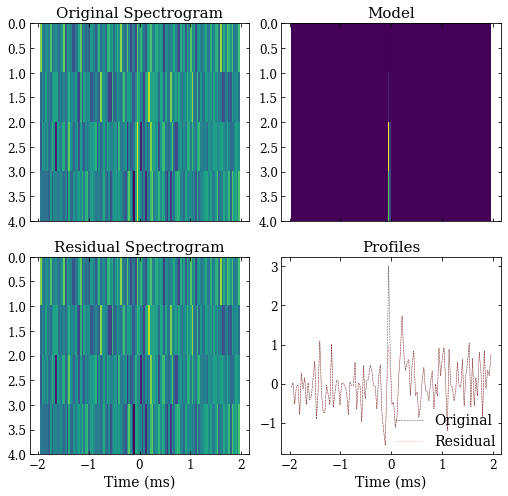

2022-06-09 23:12:46,334 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:46,335 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 23:12:46,337 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 23:12:46,339 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-09 23:12:46,340 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:46,341 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 23:12:46,343 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2608510298463065
2022-06-09 23:12:46,344 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-09 23:12:46,346 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-09 23:12:46,348 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

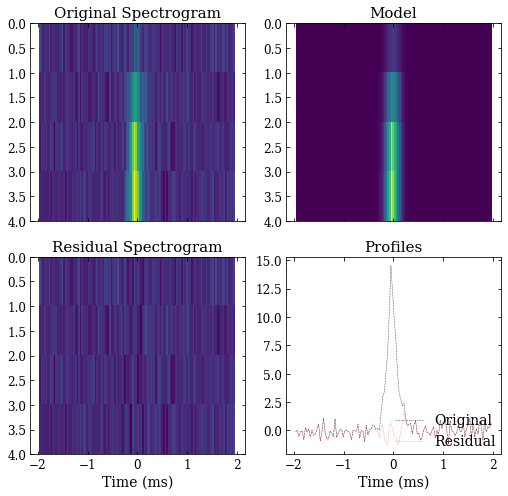

2022-06-09 23:12:47,512 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:47,513 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 23:12:47,516 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-09 23:12:47,518 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-09 23:12:47,519 - model -burstfit.fit - INFO - Making model.
2022-06-09 23:12:47,521 - model -burstfit.fit - INFO - Found 2 components.
2022-06-09 23:12:47,524 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2401406605314695
2022-06-09 23:12:47,525 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-09 23:12:47,527 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-09 23:12:47,530 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-06-09 23:1

{bf}.calc_redchisq()= 1.2401406605314695


In [11]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 50, 0),(np.inf, 70, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-10 03:38:16,040 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-10 03:38:16,041 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-10 03:38:16,044 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-06-10 03:38:16,045 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-10 03:38:16,048 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-06-10 03:38:16,049 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-10 03:38:16,053 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-06-10 03:38:16,055 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-10 03:38:16,057 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-10 03:38:16,059 - initial_profi

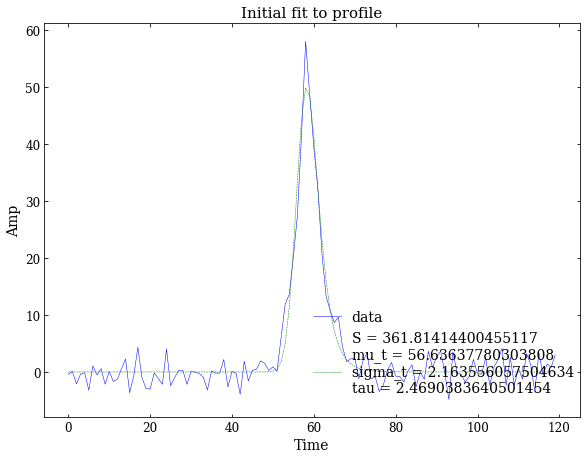

2022-06-10 03:38:16,314 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-10 03:38:16,318 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe543a1e1e0>
[0.08730642 0.26856065 0.43957722 0.49641785]


2022-06-10 03:38:16,325 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-10 03:38:16,328 - initial_spectrafit -burstfit.fit - INFO - c0: 0.0873064175248146 +- 0.0
2022-06-10 03:38:16,330 - initial_spectrafit -burstfit.fit - INFO - c1: 0.26856064796447754 +- 0.0
2022-06-10 03:38:16,331 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43957722187042236 +- 0.0


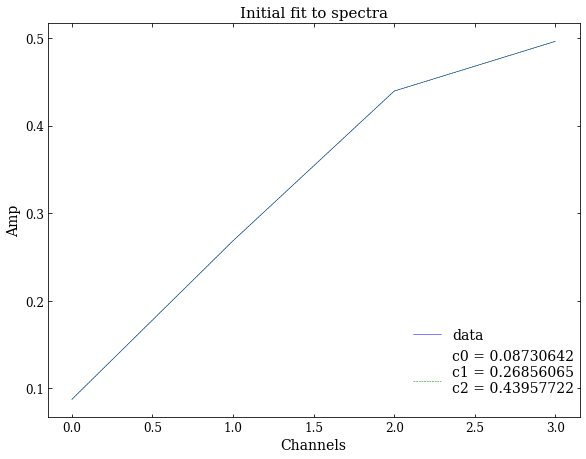

2022-06-10 03:38:16,477 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-10 03:38:16,480 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08730642, 0.26856065, 0.43957722, 361.81414400455117, 56.63637780303808, 2.163556057504634, 2.4690383640501454, 111]
2022-06-10 03:38:16,599 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-10 03:38:16,602 - sgram_fit -burstfit.fit - INFO - c0: 0.09290958560828479 +- 0.011218566188236054
2022-06-10 03:38:16,604 - sgram_fit -burstfit.fit - INFO - c1: 0.2722176990175081 +- 0.012752945652483211
2022-06-10 03:38:16,606 - sgram_fit -burstfit.fit - INFO - c2: 0.4398315250088616 +- 0.011249646048841903
2022-06-10 03:38:16,608 - sgram_fit -burstfit.fit - INFO - S: 311.07324218127513 +- 2.253951172924655
2022-06-10 03:38:16,611 - sgram_fit -burstfit.fit - INFO - mu_t: 57.0274450442017 +- 0.21111714782778174
2022-06-10 03:38:16,612 - sgram_fit -burstfit.fit - INFO - sigma_t: 2.36139

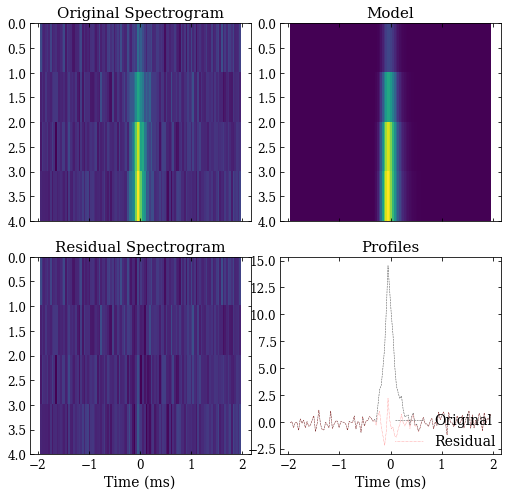

2022-06-10 03:38:17,020 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:17,022 - model -burstfit.fit - INFO - Found 1 components.
2022-06-10 03:38:17,024 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-10 03:38:17,026 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-10 03:38:17,027 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:17,029 - model -burstfit.fit - INFO - Found 1 components.
2022-06-10 03:38:17,032 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3308353640504864
2022-06-10 03:38:17,033 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-10 03:38:17,035 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-10 03:38:17,037 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 1.3308353640504864


In [16]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 50, 0, 0),(np.inf, 65, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-10 03:38:00,613 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-10 03:38:00,615 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-10 03:38:00,618 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-06-10 03:38:00,620 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-10 03:38:00,623 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-06-10 03:38:00,624 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-10 03:38:00,627 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-06-10 03:38:00,628 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-10 03:38:00,629 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-10 03:38:00,630 - initial_profi

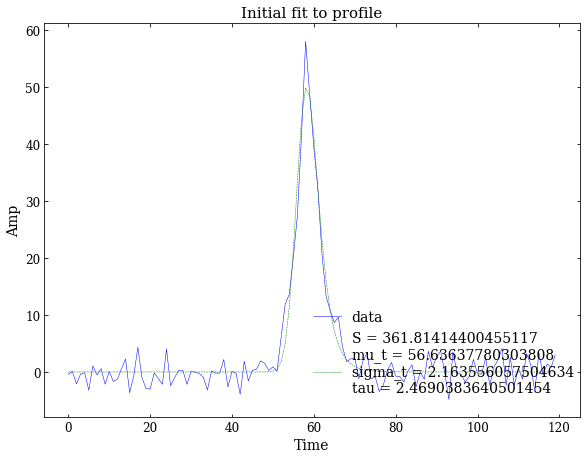

2022-06-10 03:38:00,808 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-10 03:38:00,809 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe543a1e1e0>
[0.08730642 0.26856065 0.43957722 0.49641785]


2022-06-10 03:38:00,815 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-10 03:38:00,818 - initial_spectrafit -burstfit.fit - INFO - c0: 0.0873064175248146 +- 0.0
2022-06-10 03:38:00,819 - initial_spectrafit -burstfit.fit - INFO - c1: 0.26856064796447754 +- 0.0
2022-06-10 03:38:00,821 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43957722187042236 +- 0.0


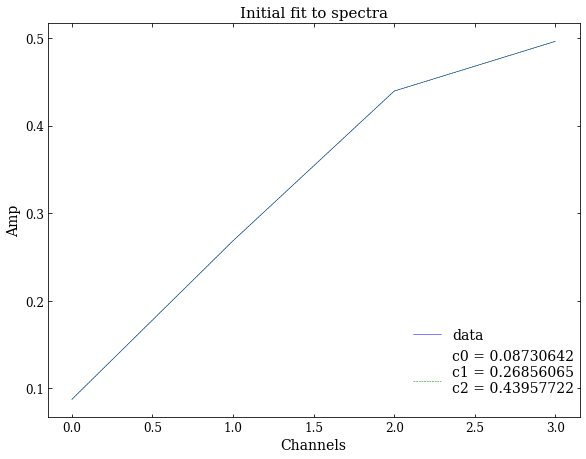

2022-06-10 03:38:00,952 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-10 03:38:00,953 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08730642, 0.26856065, 0.43957722, 361.81414400455117, 56.63637780303808, 2.163556057504634, 2.4690383640501454, 111]
2022-06-10 03:38:01,068 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-10 03:38:01,071 - sgram_fit -burstfit.fit - INFO - c0: 0.09290958560828479 +- 0.011218566188236054
2022-06-10 03:38:01,073 - sgram_fit -burstfit.fit - INFO - c1: 0.2722176990175081 +- 0.012752945652483211
2022-06-10 03:38:01,075 - sgram_fit -burstfit.fit - INFO - c2: 0.4398315250088616 +- 0.011249646048841903
2022-06-10 03:38:01,077 - sgram_fit -burstfit.fit - INFO - S: 311.07324218127513 +- 2.253951172924655
2022-06-10 03:38:01,079 - sgram_fit -burstfit.fit - INFO - mu_t: 57.0274450442017 +- 0.21111714782778174
2022-06-10 03:38:01,081 - sgram_fit -burstfit.fit - INFO - sigma_t: 2.36139

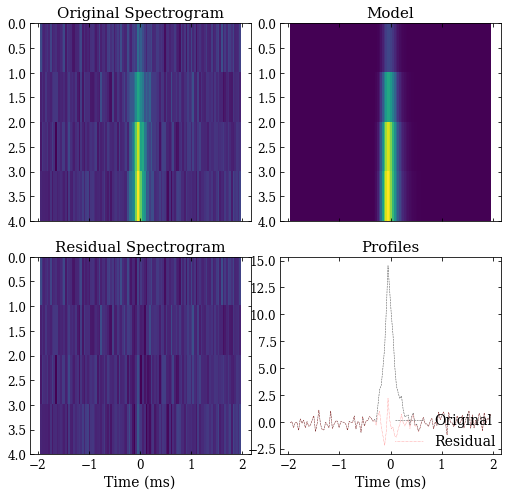

2022-06-10 03:38:01,641 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:01,644 - model -burstfit.fit - INFO - Found 1 components.
2022-06-10 03:38:01,647 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-10 03:38:01,649 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-10 03:38:01,652 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:01,653 - model -burstfit.fit - INFO - Found 1 components.
2022-06-10 03:38:01,656 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3308353640504864
2022-06-10 03:38:01,658 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-10 03:38:01,659 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-10 03:38:01,661 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-10 03:38:01,713 - initial_profile

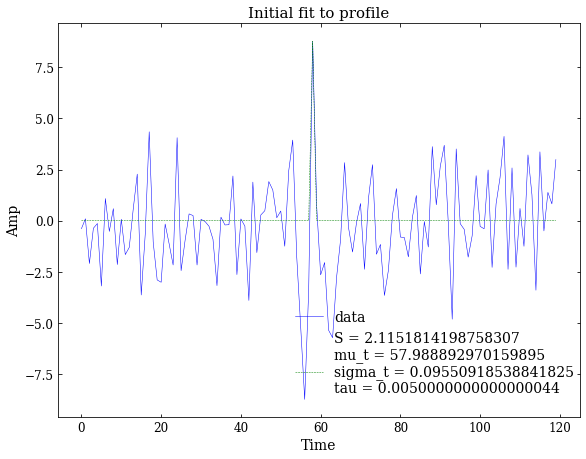

2022-06-10 03:38:01,952 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-10 03:38:01,955 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7fe543a1e1e0>
[0.4455213872447999 1.0032096525844603 -0.5552018946744655
 0.6584630969352104]


2022-06-10 03:38:01,960 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-10 03:38:01,961 - initial_spectrafit -burstfit.fit - INFO - c0: 0.4455213872447999 +- 0.0
2022-06-10 03:38:01,963 - initial_spectrafit -burstfit.fit - INFO - c1: 1.0032096525844603 +- 0.0
2022-06-10 03:38:01,964 - initial_spectrafit -burstfit.fit - INFO - c2: -0.5552018946744655 +- 0.0


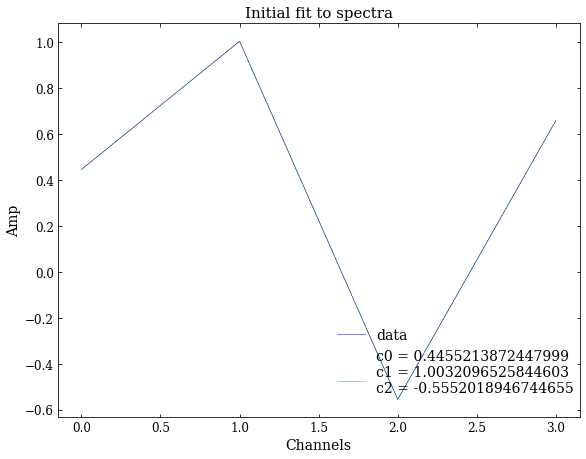

2022-06-10 03:38:02,164 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-10 03:38:02,167 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.4455213872447999, 1.0032096525844603, -0.5552018946744655, 2.1151814198758307, 57.988892970159895, 0.09550918538841825, 0.0050000000000000044, 111]
2022-06-10 03:38:02,321 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-10 03:38:02,586 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-10 03:38:02,589 - sgram_fit -burstfit.fit - INFO - c0: 0.35641710979584 +- 0.5655102728322527
2022-06-10 03:38:02,591 - sgram_fit -burstfit.fit - INFO - c1: 0.8025677220675683 +- 0.743472192203962
2022-06-10 03:38:02,593 - sgram_fit -burstfit.fit - INFO - c2: -0.6662422736093584 +- 1.208689470797777
2022-06-10 03:38:02,596 - sgram_fit -burstfit.fit - INFO - S: 1.8965195101054657 +- 10.288684371462791
2022-06-10 03:38:02,598 - sgram_

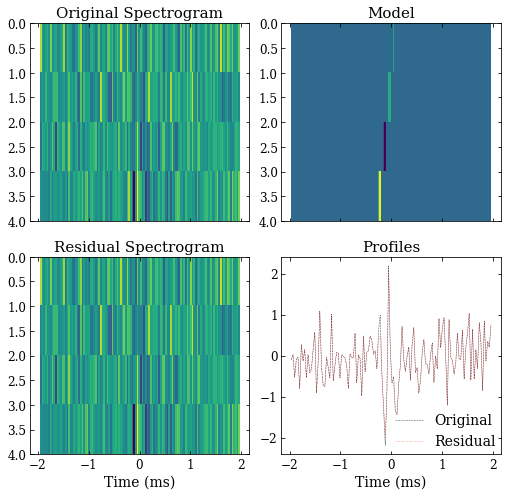

2022-06-10 03:38:02,998 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:02,999 - model -burstfit.fit - INFO - Found 2 components.
2022-06-10 03:38:03,003 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-10 03:38:03,004 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-10 03:38:03,007 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:03,009 - model -burstfit.fit - INFO - Found 2 components.
2022-06-10 03:38:03,012 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.333831376510392
2022-06-10 03:38:03,014 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-10 03:38:03,016 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-10 03:38:03,017 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-0

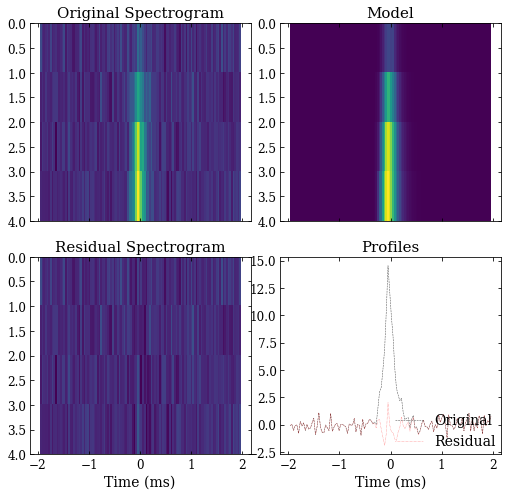

2022-06-10 03:38:04,023 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:04,026 - model -burstfit.fit - INFO - Found 2 components.
2022-06-10 03:38:04,030 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-10 03:38:04,055 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-10 03:38:04,057 - model -burstfit.fit - INFO - Making model.
2022-06-10 03:38:04,064 - model -burstfit.fit - INFO - Found 2 components.
2022-06-10 03:38:04,068 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3336838085377842
2022-06-10 03:38:04,073 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-10 03:38:04,075 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-10 03:38:04,081 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-06-10 03:3

{bf}.calc_redchisq()= 1.3336838085377842


In [15]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 50, 0, 0),(np.inf, 65, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-06-10 03:38:33,660 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-10 03:38:33,664 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [9.23651939e-02 2.70273681e-01 4.39332560e-01 2.84415995e+02
 5.85329141e+01 3.13654786e+00 1.10996728e+02]
2022-06-10 03:38:33,669 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-10 03:38:33,671 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-10 03:38:33,673 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-10 03:38:33,685 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-10 03:38:33,687 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-06-10 03:38:33,689 - run_mcmc -burst

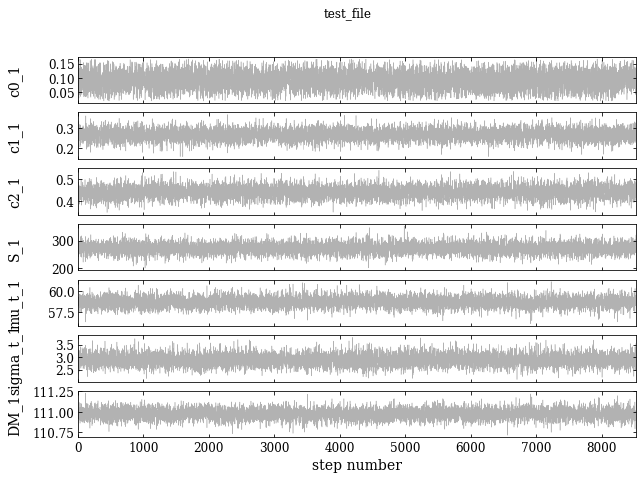

<Figure size 432x288 with 0 Axes>

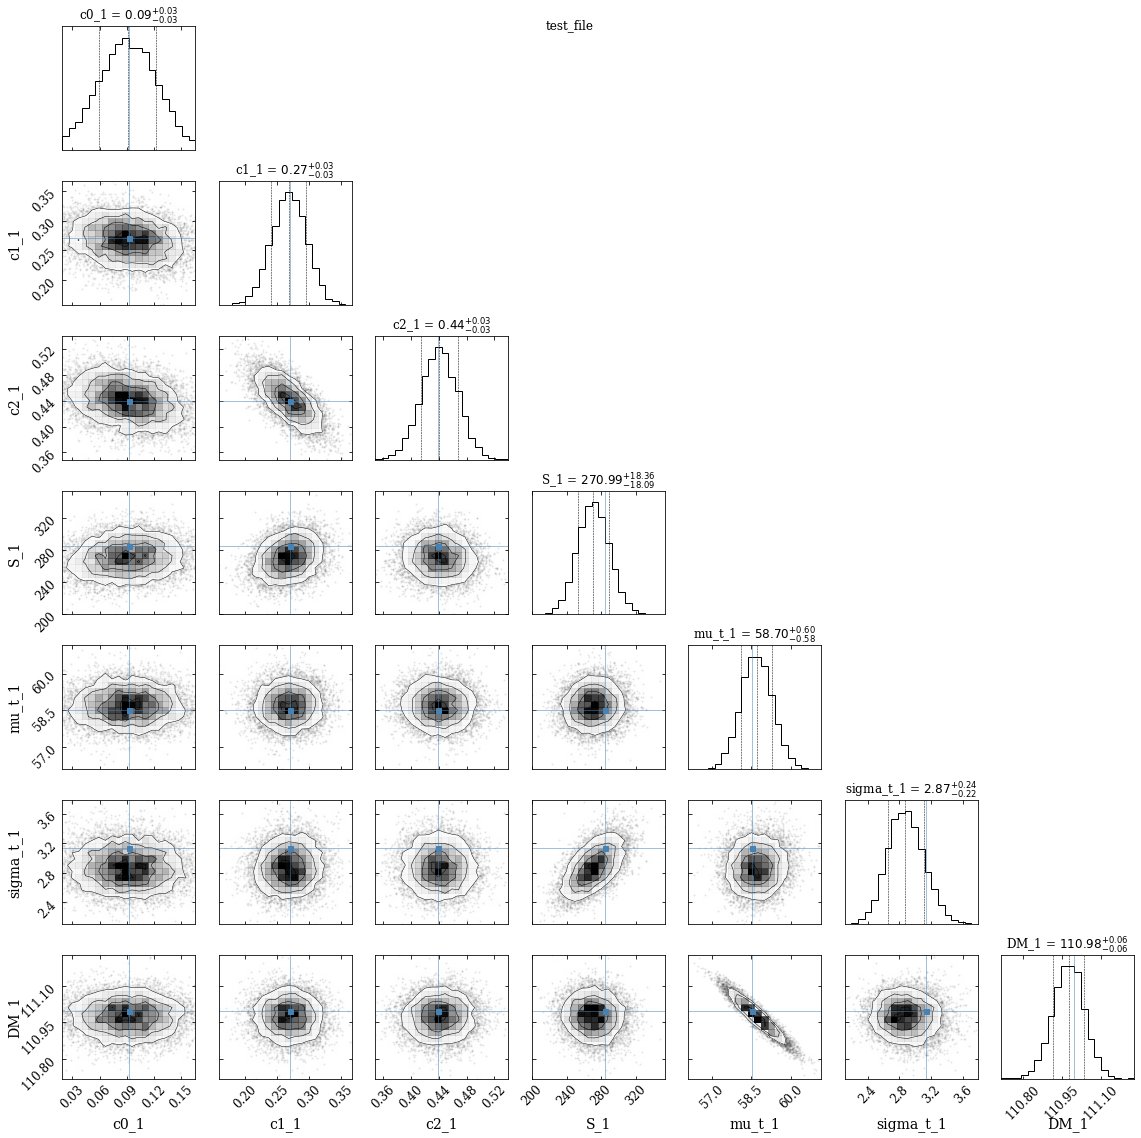

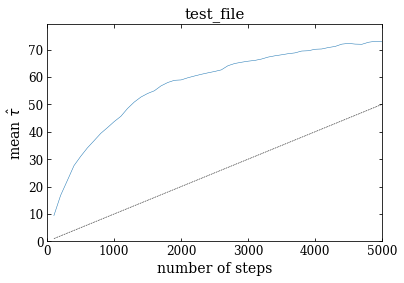

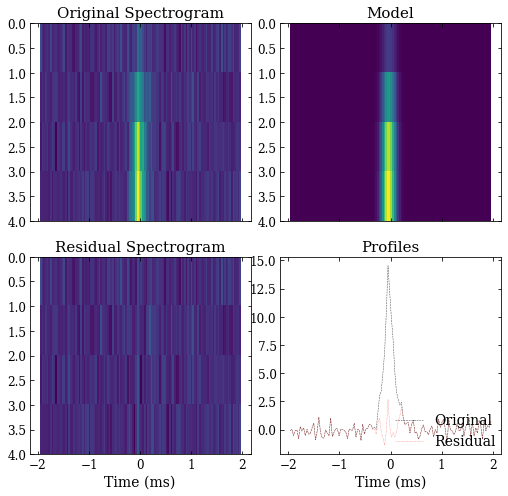

{bf}.bic =  110.58116771795545


0

In [17]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True)

2022-06-10 03:43:04,118 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-10 03:43:04,119 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [ 9.98159254e-02  2.85326327e-01  4.31224680e-01  2.83488014e+02
  5.88683925e+01  3.15923010e+00  1.10963163e+02 -4.92562817e-03
  6.46500782e-02  5.85877556e-01  2.75832676e+00  5.79367075e+01
  7.88976331e-02  1.11024827e+02]
2022-06-10 03:43:04,121 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-10 03:43:04,122 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-10 03:43:04,124 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-10 03:43:04,129 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022

2022-06-10 03:47:25,387 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:25,481 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:25,713 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:25,795 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:25,919 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:26,075 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:26,163 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:26,241 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:26,375 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:26,464 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:47:26,549 - hist2d -root - WARNING - Too few points to create valid contours

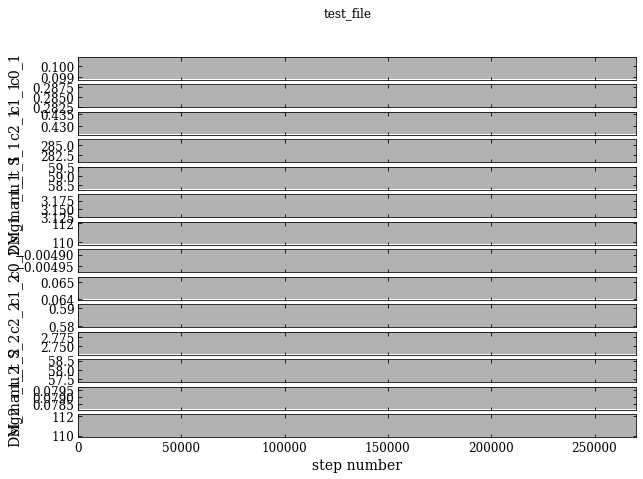

<Figure size 432x288 with 0 Axes>

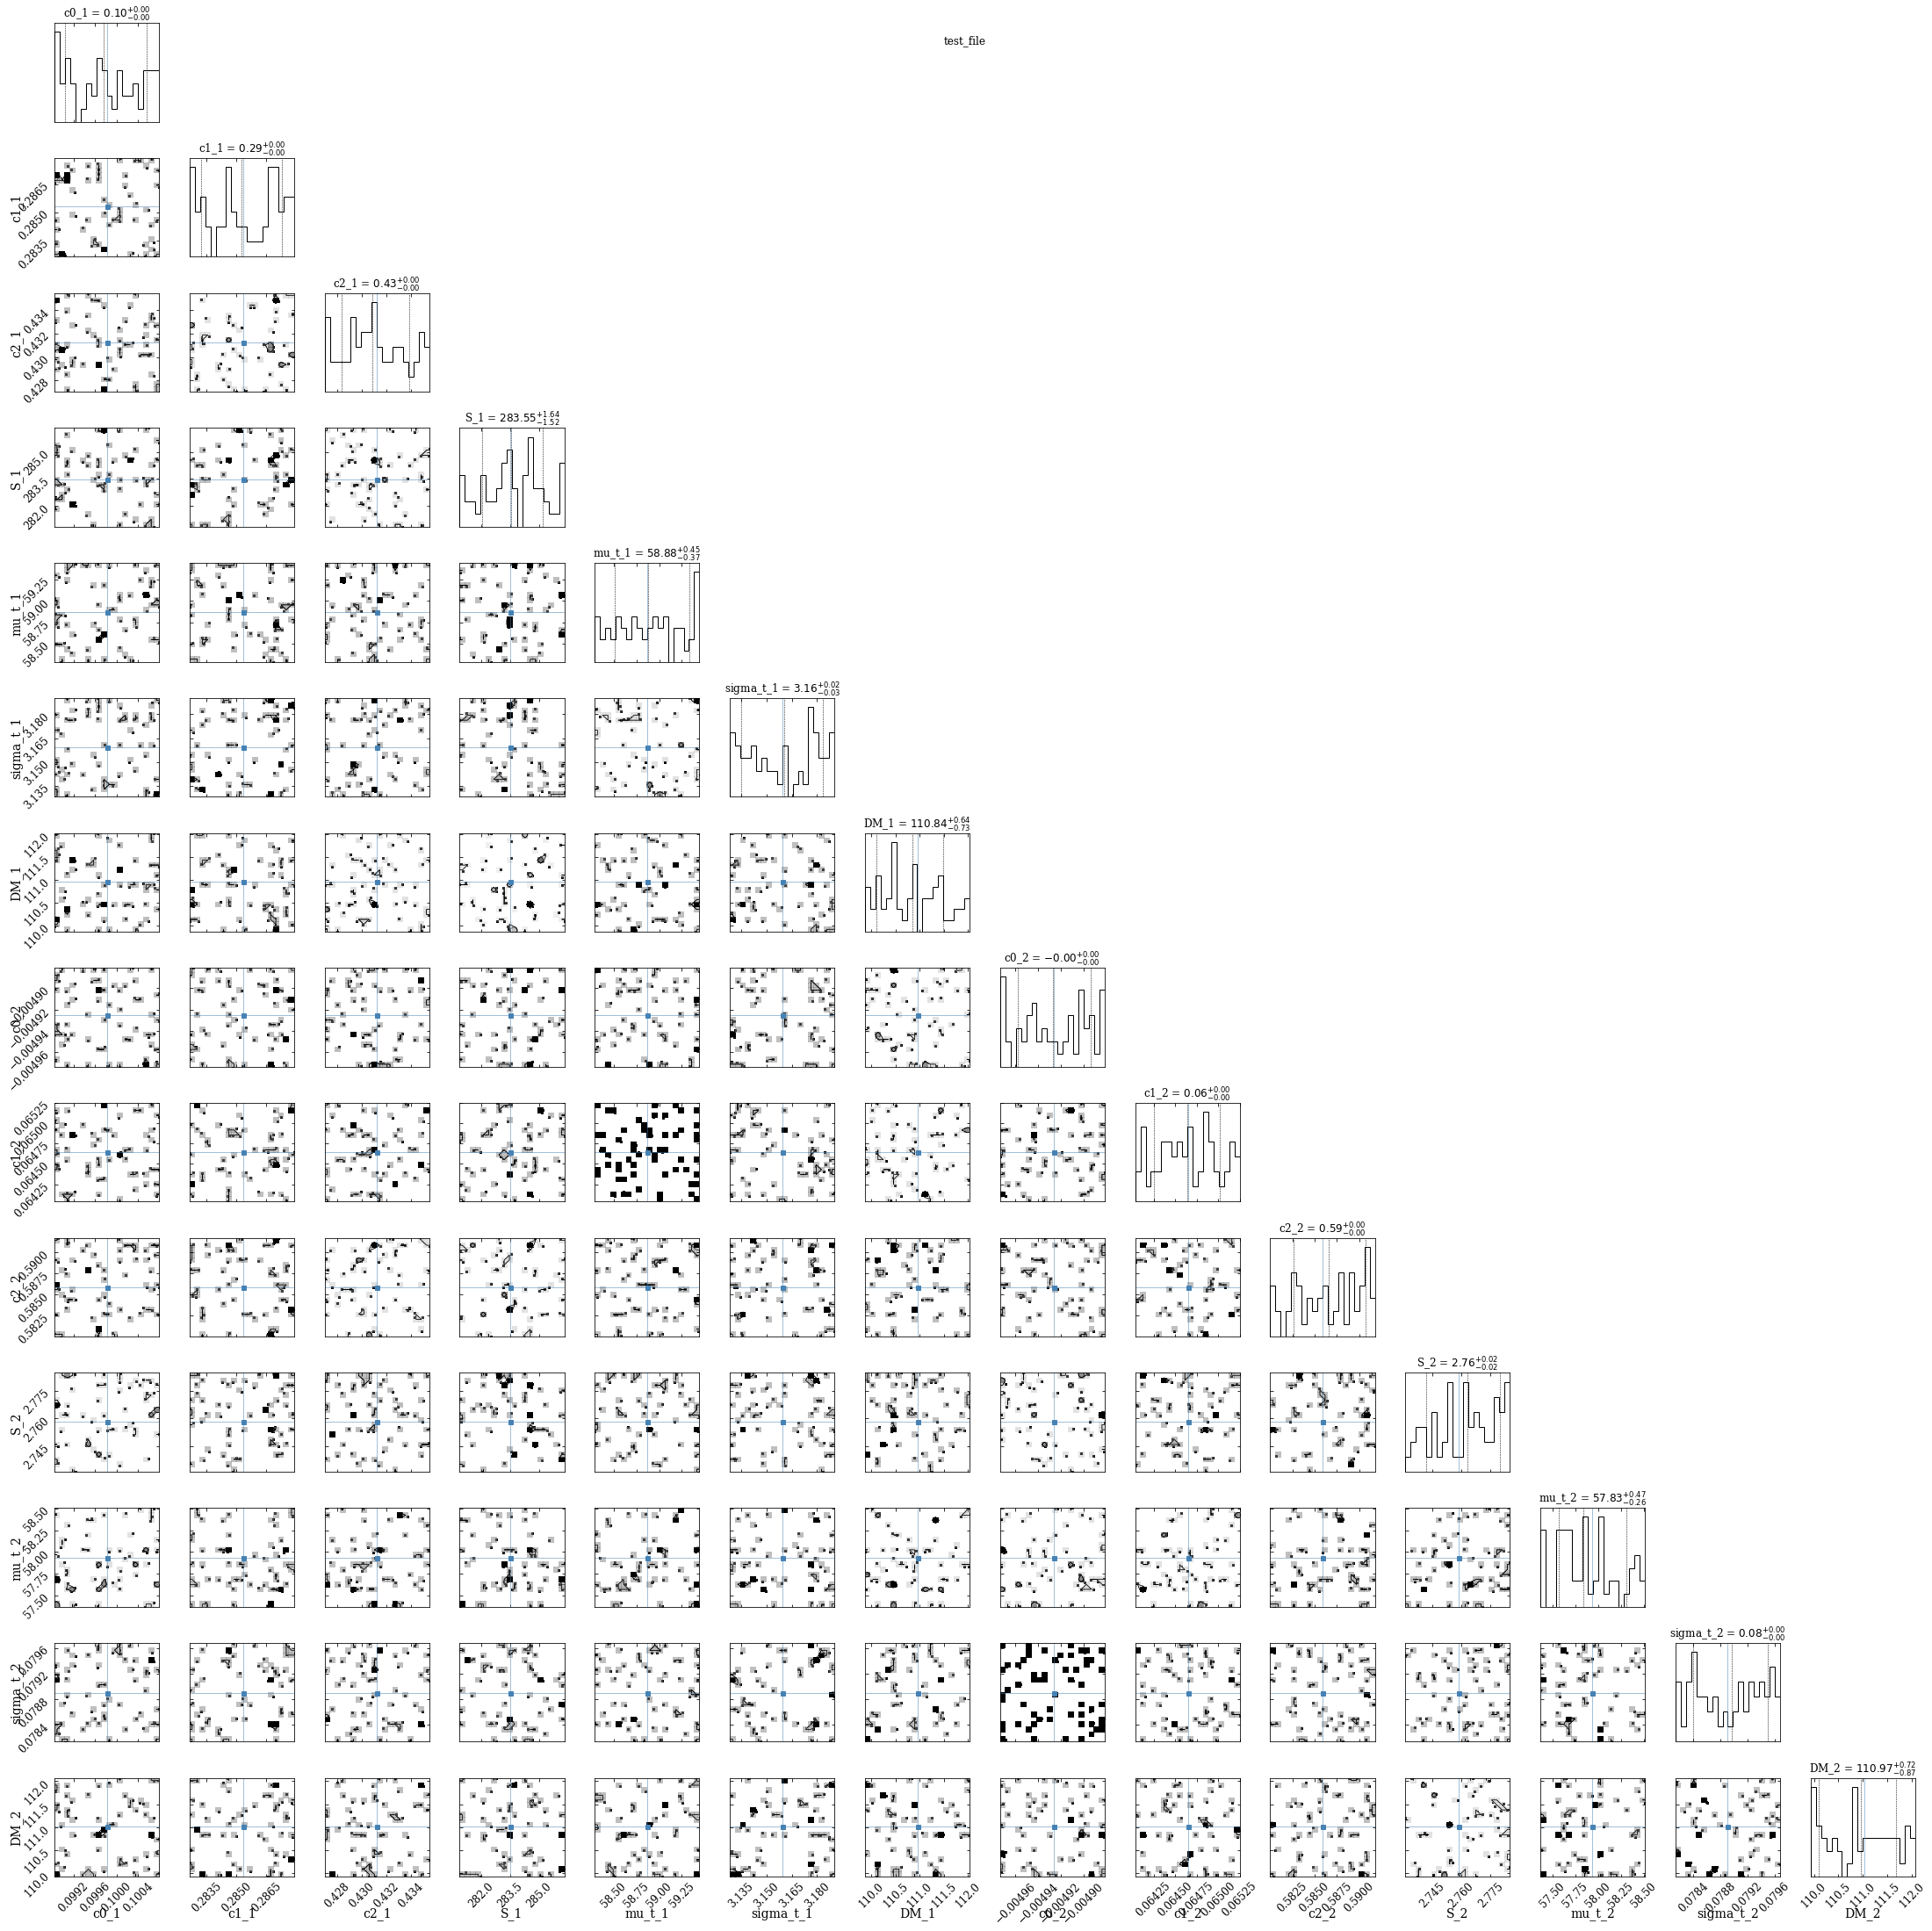

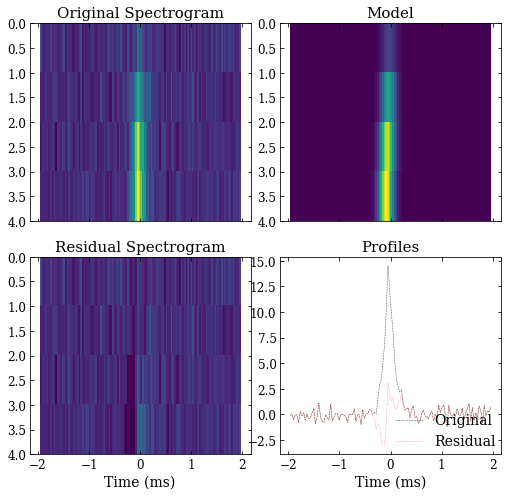

{bf}.bic =  148.8133115428212


0

In [18]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True)

2022-06-10 03:49:01,493 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-10 03:49:01,496 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [9.29095856e-02 2.72217699e-01 4.39831525e-01 3.11073242e+02
 5.70274450e+01 2.36139620e+00 2.17617891e+00 1.10919188e+02]
2022-06-10 03:49:01,499 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-10 03:49:01,502 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-10 03:49:01,505 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-10 03:49:01,507 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(3.9171220332065473) + max_sigma_t_prior(4.250513167694049))
2022-06-10 03:49:01,509 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*

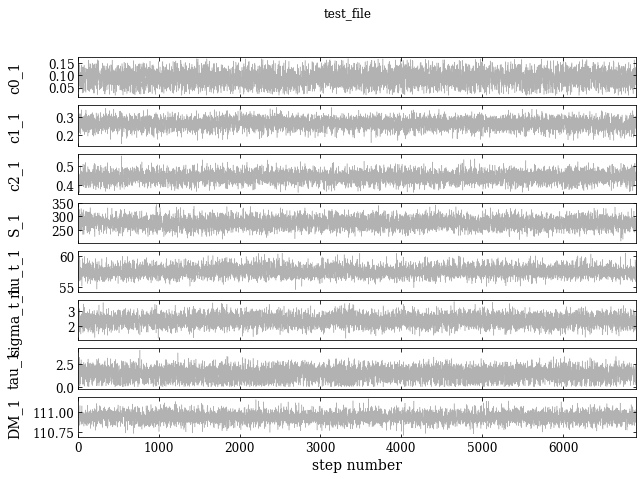

<Figure size 432x288 with 0 Axes>

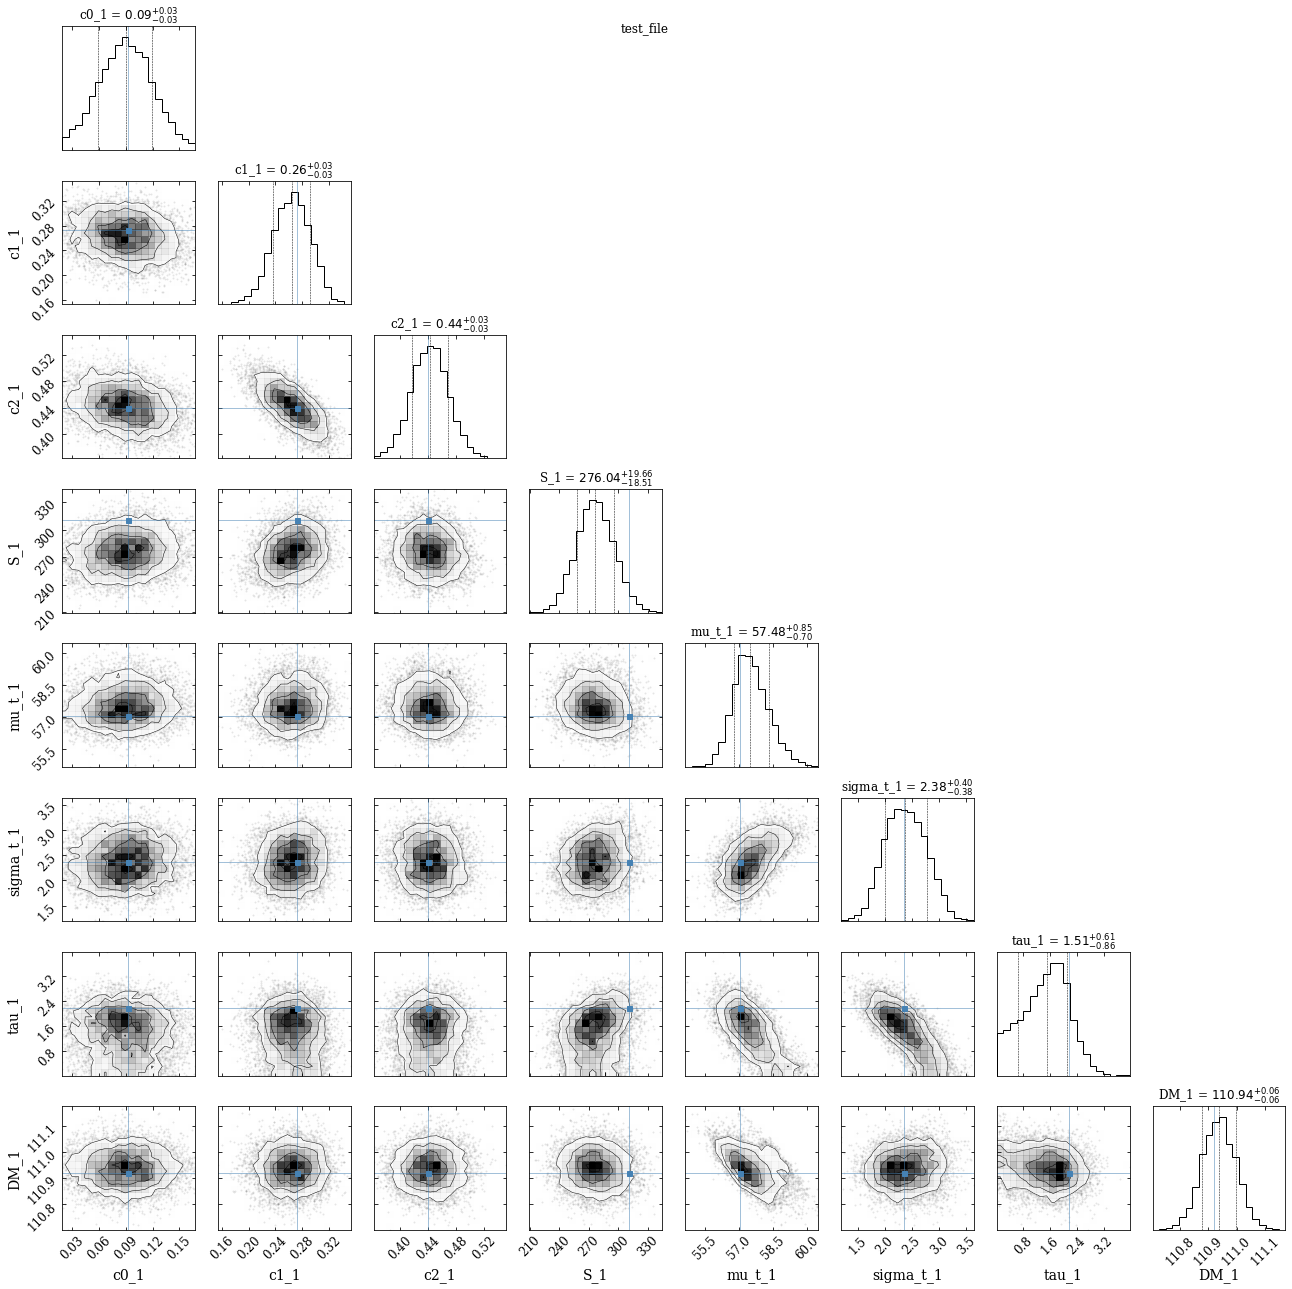

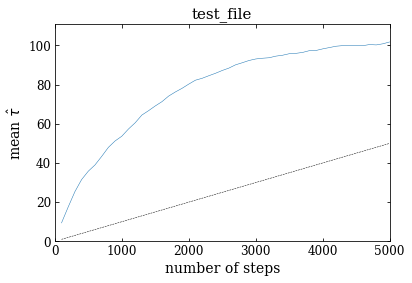

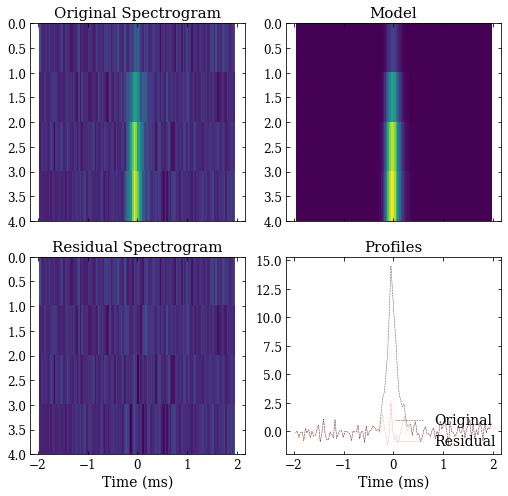

{bf}.bic =  117.03879577021044


0

In [19]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True)

2022-06-10 03:54:12,418 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-10 03:54:12,420 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [ 9.28970871e-02  2.71729738e-01  4.40560456e-01  3.11081647e+02
  5.70348389e+01  2.36412889e+00  2.17522217e+00  1.10918945e+02
  3.56380616e-01  8.02496594e-01 -6.66305349e-01  1.89651951e+00
  6.08296313e+01  1.14474157e-01  5.00000000e-03  1.10323464e+02]
2022-06-10 03:54:12,422 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-10 03:54:12,424 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-10 03:54:12,425 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-10 03:54:12,427 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(3.9153999095024066) + max_sigma_t_prior(4.255432004561873))
2022-

2022-06-10 03:58:42,227 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,330 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,436 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,564 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,703 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,796 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,881 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:42,949 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:43,013 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:43,079 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:43,270 - hist2d -root - WARNING - Too few points to create valid contours

2022-06-10 03:58:51,308 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:51,417 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:51,535 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:51,628 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:51,740 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:58:51,828 - hist2d -root - WARNING - Too few points to create valid contours
2022-06-10 03:59:45,853 - make_autocorr_plot -burstfit.mcmc - WARNING - Not enough valid autocorrelation values to plot. Not making autocorrelation plot.


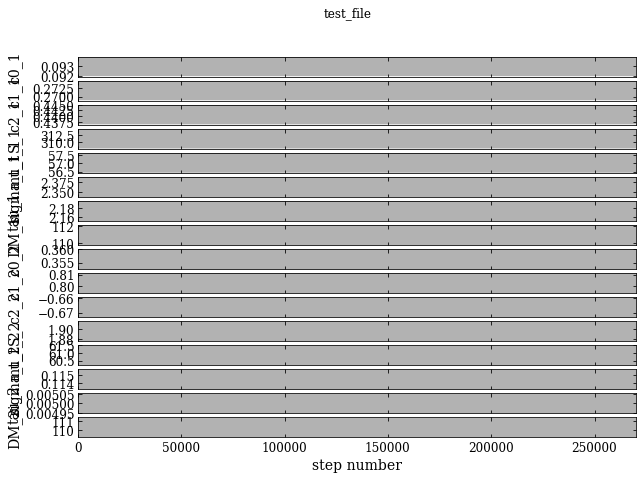

<Figure size 432x288 with 0 Axes>

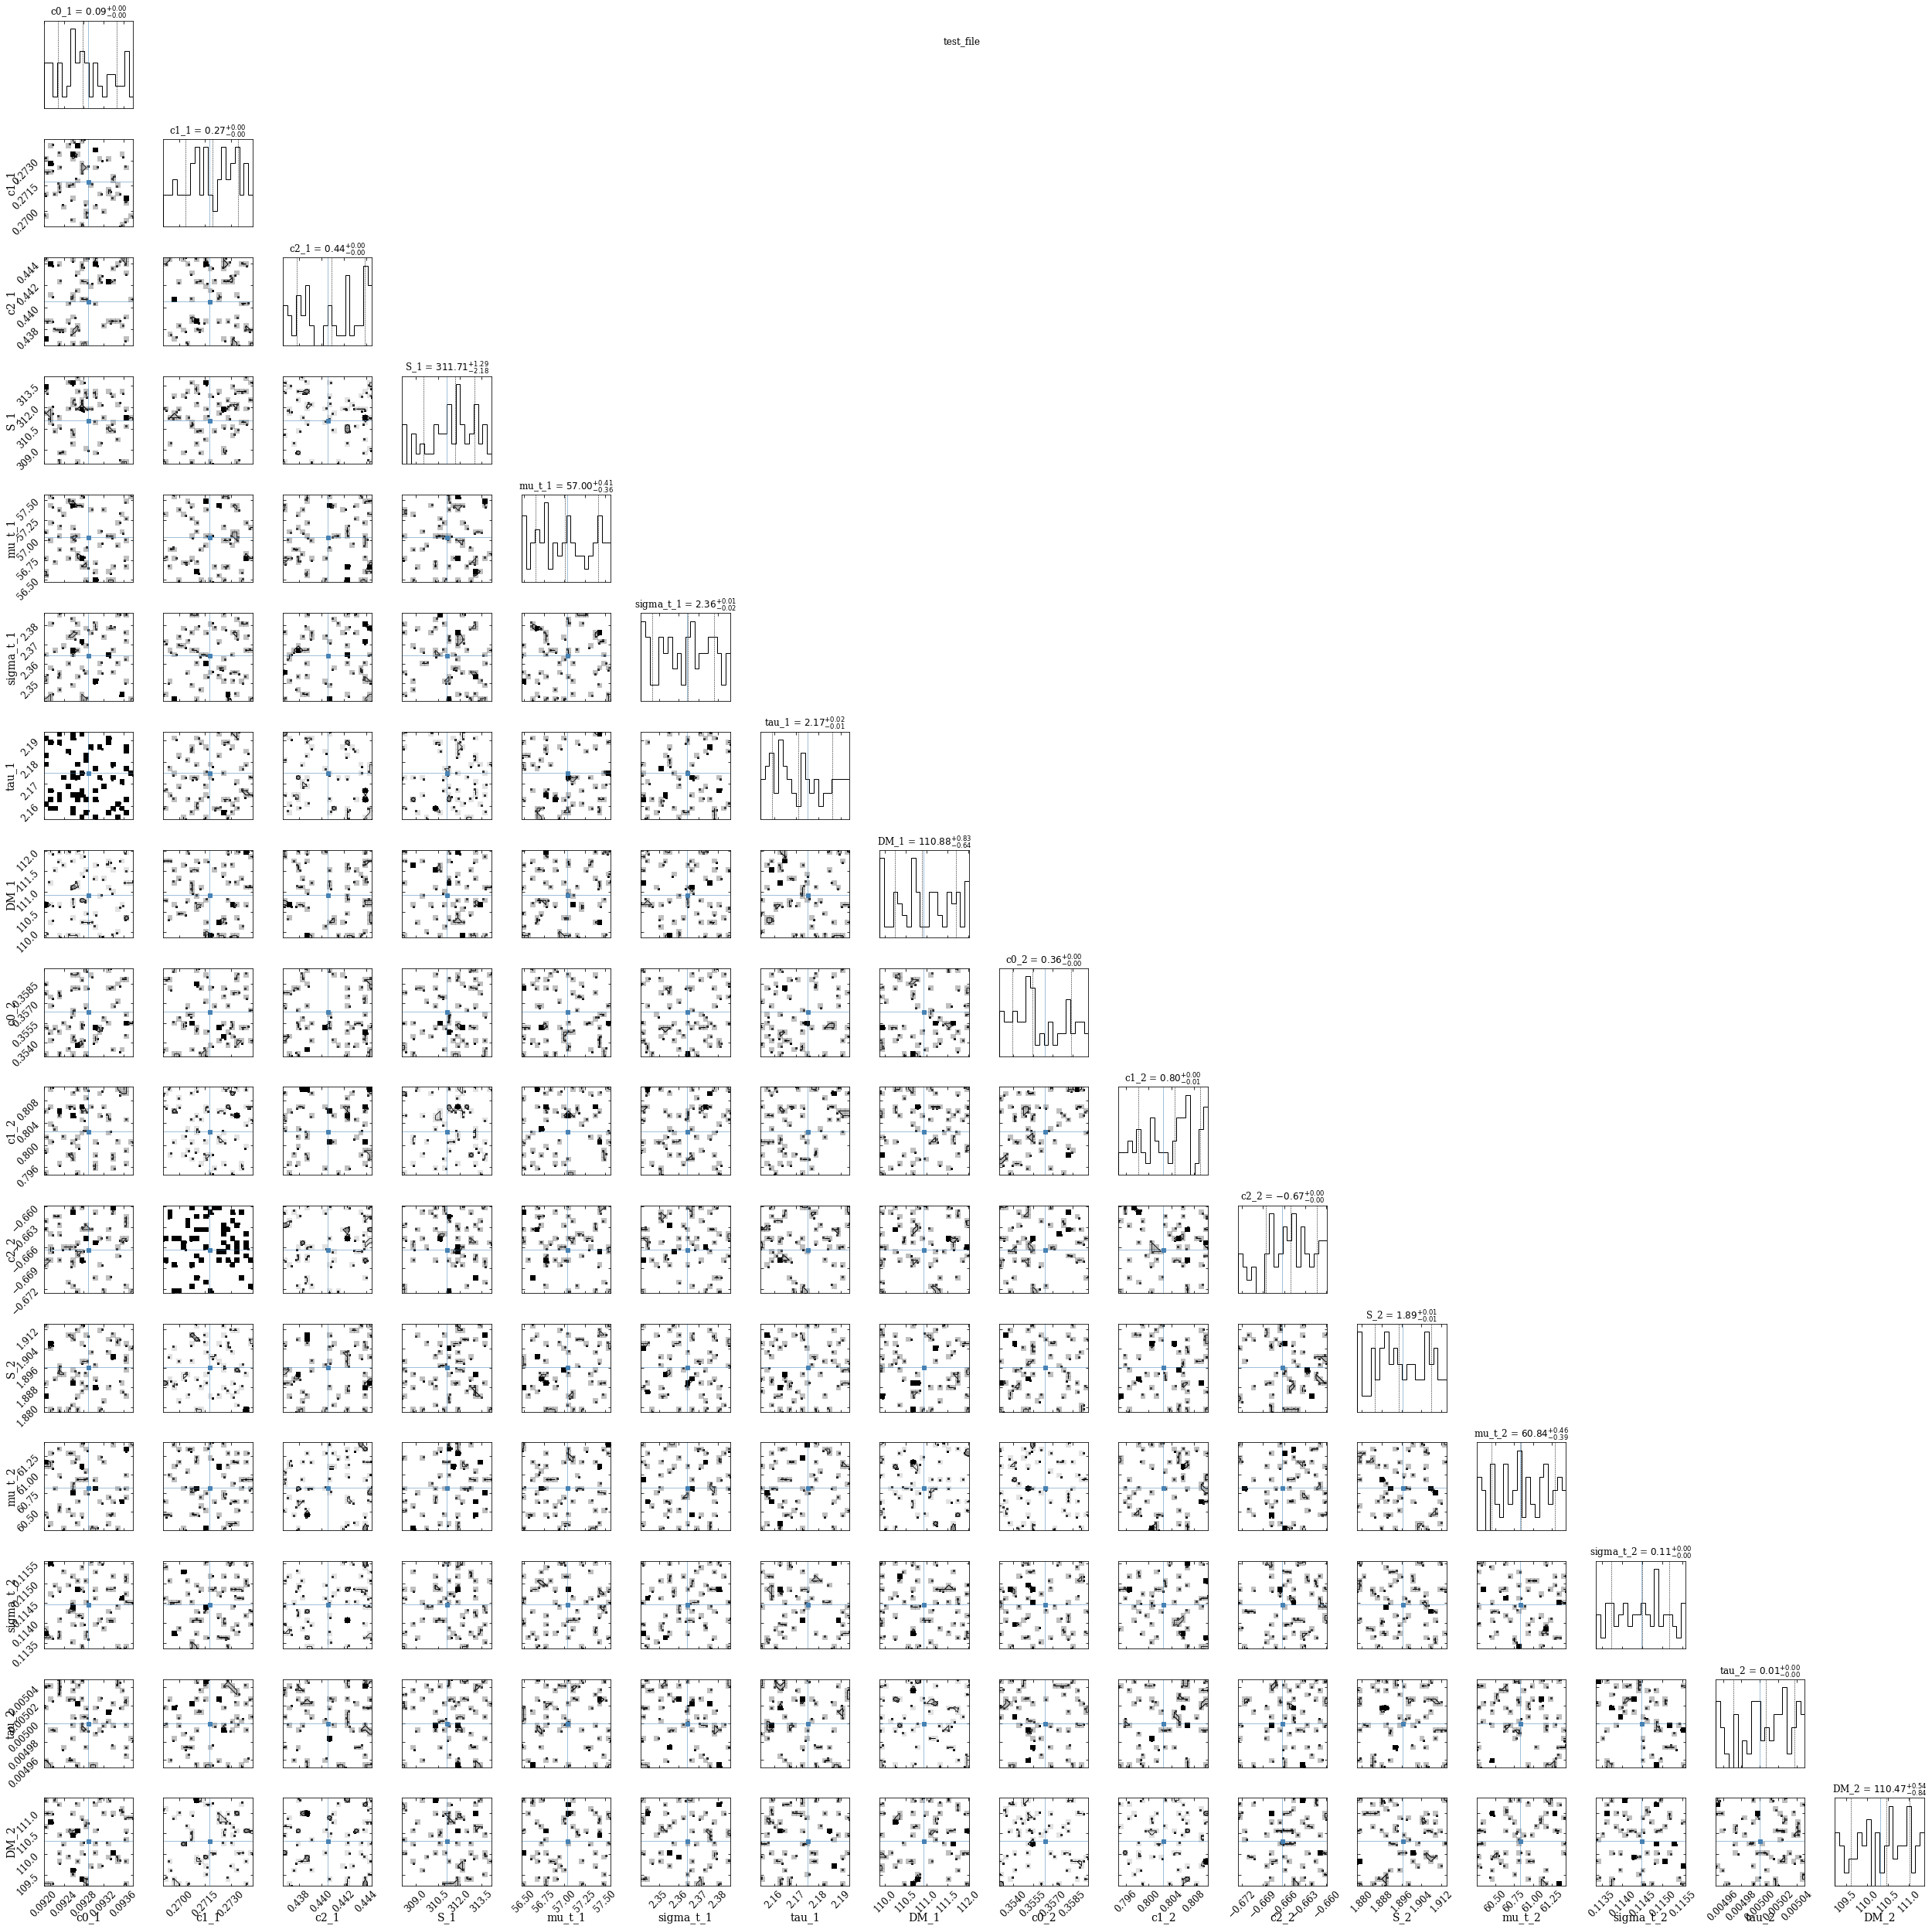

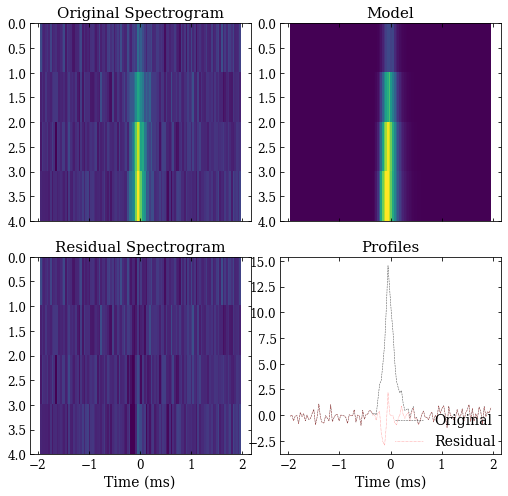

{bf}.bic =  165.4248366780293


0

In [20]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True)

### select model and save results 

In [21]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3 not used
['bf_S1T1_c1', 'bf_S1T2_c1', 'bf_S1T1_c2', 'bf_S1T2_c2']
[110.58116771795545, 117.03879577021044, 148.8133115428212, 165.4248366780293]


0

In [22]:
np.shape(data_burst)

(4, 120)

In [23]:
bd.tstart

59607.0

In [24]:
bd_heimdall.tstart

55000.0